In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
time_folder = "24-08-01"
base_folder = "/data3/lsf/Pein/Power-Prediction/res_output/"

path = base_folder + time_folder + "_result/" + time_folder + "-joined_metrics.csv"
df = pd.read_csv(path)

# Truncate values larger than 3000 to be 3000
clip_value = np.inf 
df["train_rmse"] = df["train_rmse"].clip(upper=clip_value)
df["val_rmse"] = df["val_rmse"].clip(upper=clip_value)
df["test_rmse"] = df["test_rmse"].clip(upper=clip_value)

# Display the first few rows of the dataframe
print(df.head())

# remove those rows where the val_rmse and test_rmse are larger than 1000
# df = df[df["val_rmse"] <= 1000]
# df = df[df["test_rmse"] <= 1000]


           exp_date   train_rmse  train_custom_acc  val_rmse_for_best_train  \
0  2024-08-02 02:13    37501.555         59.428665                77866.164   
1  2024-08-01 22:46  1542088.100       -994.344971               235975.970   
2  2024-08-02 04:38    34825.380         64.806442                82388.110   
3  2024-08-02 04:36    34765.625         62.799587                93306.550   
4  2024-08-02 02:43    41456.473         58.419014                78429.550   

   val_custom_acc_for_best_train  test_rmse_for_best_train  \
0                      43.329617                 71224.336   
1                    -217.085815                263727.620   
2                      24.486612                 75254.570   
3                      14.207887                 75218.660   
4                      43.721733                 73953.880   

   test_custom_acc_for_best_train  train_epoch_for_best_train      val_rmse  \
0                       44.154152                          10  7.987679e+

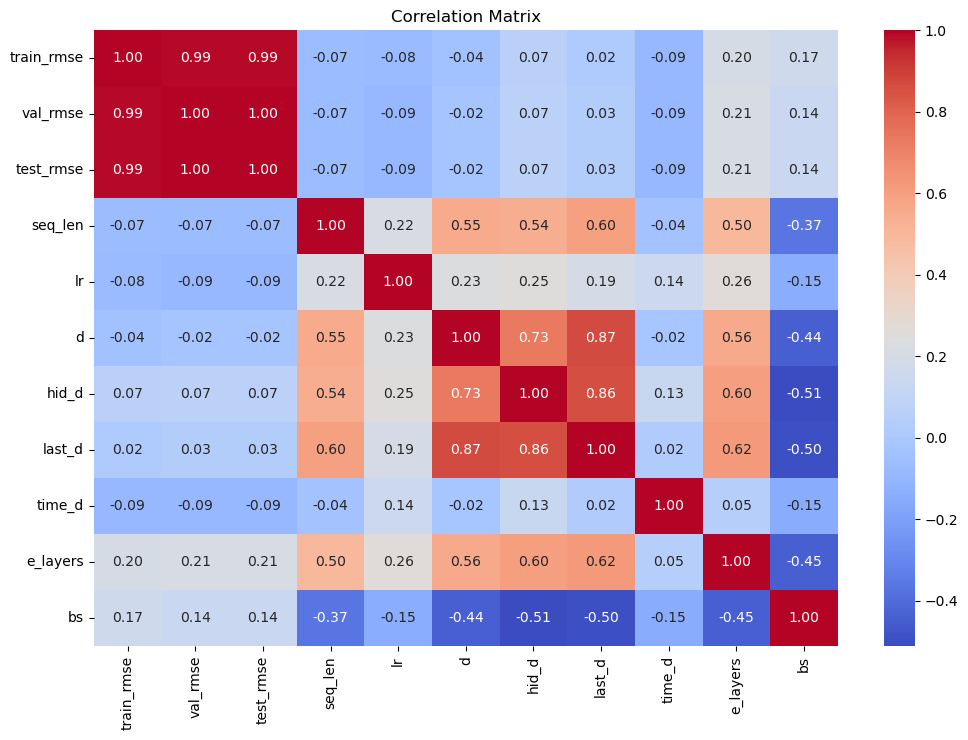

In [18]:
# Correlation matrix
corr_matrix = df[
    [
        "train_rmse",
        "val_rmse",
        "test_rmse",
        "seq_len",
        "lr",
        "d",
        "hid_d",
        "last_d",
        "time_d",
        "e_layers",
        "bs",
    ]
].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [19]:
# # Pairplot to visualize relationships
# sns.pairplot(
#     df[
#         [
#             "train_rmse",
#             "val_rmse",
#             "test_rmse",
#             "seq_len",
#             "lr",
#             "d",
#             "hid_d",
#             "last_d",
#             "time_d",
#             "e_layers",
#             "bs",
#         ]
#     ]
# )
# plt.show()

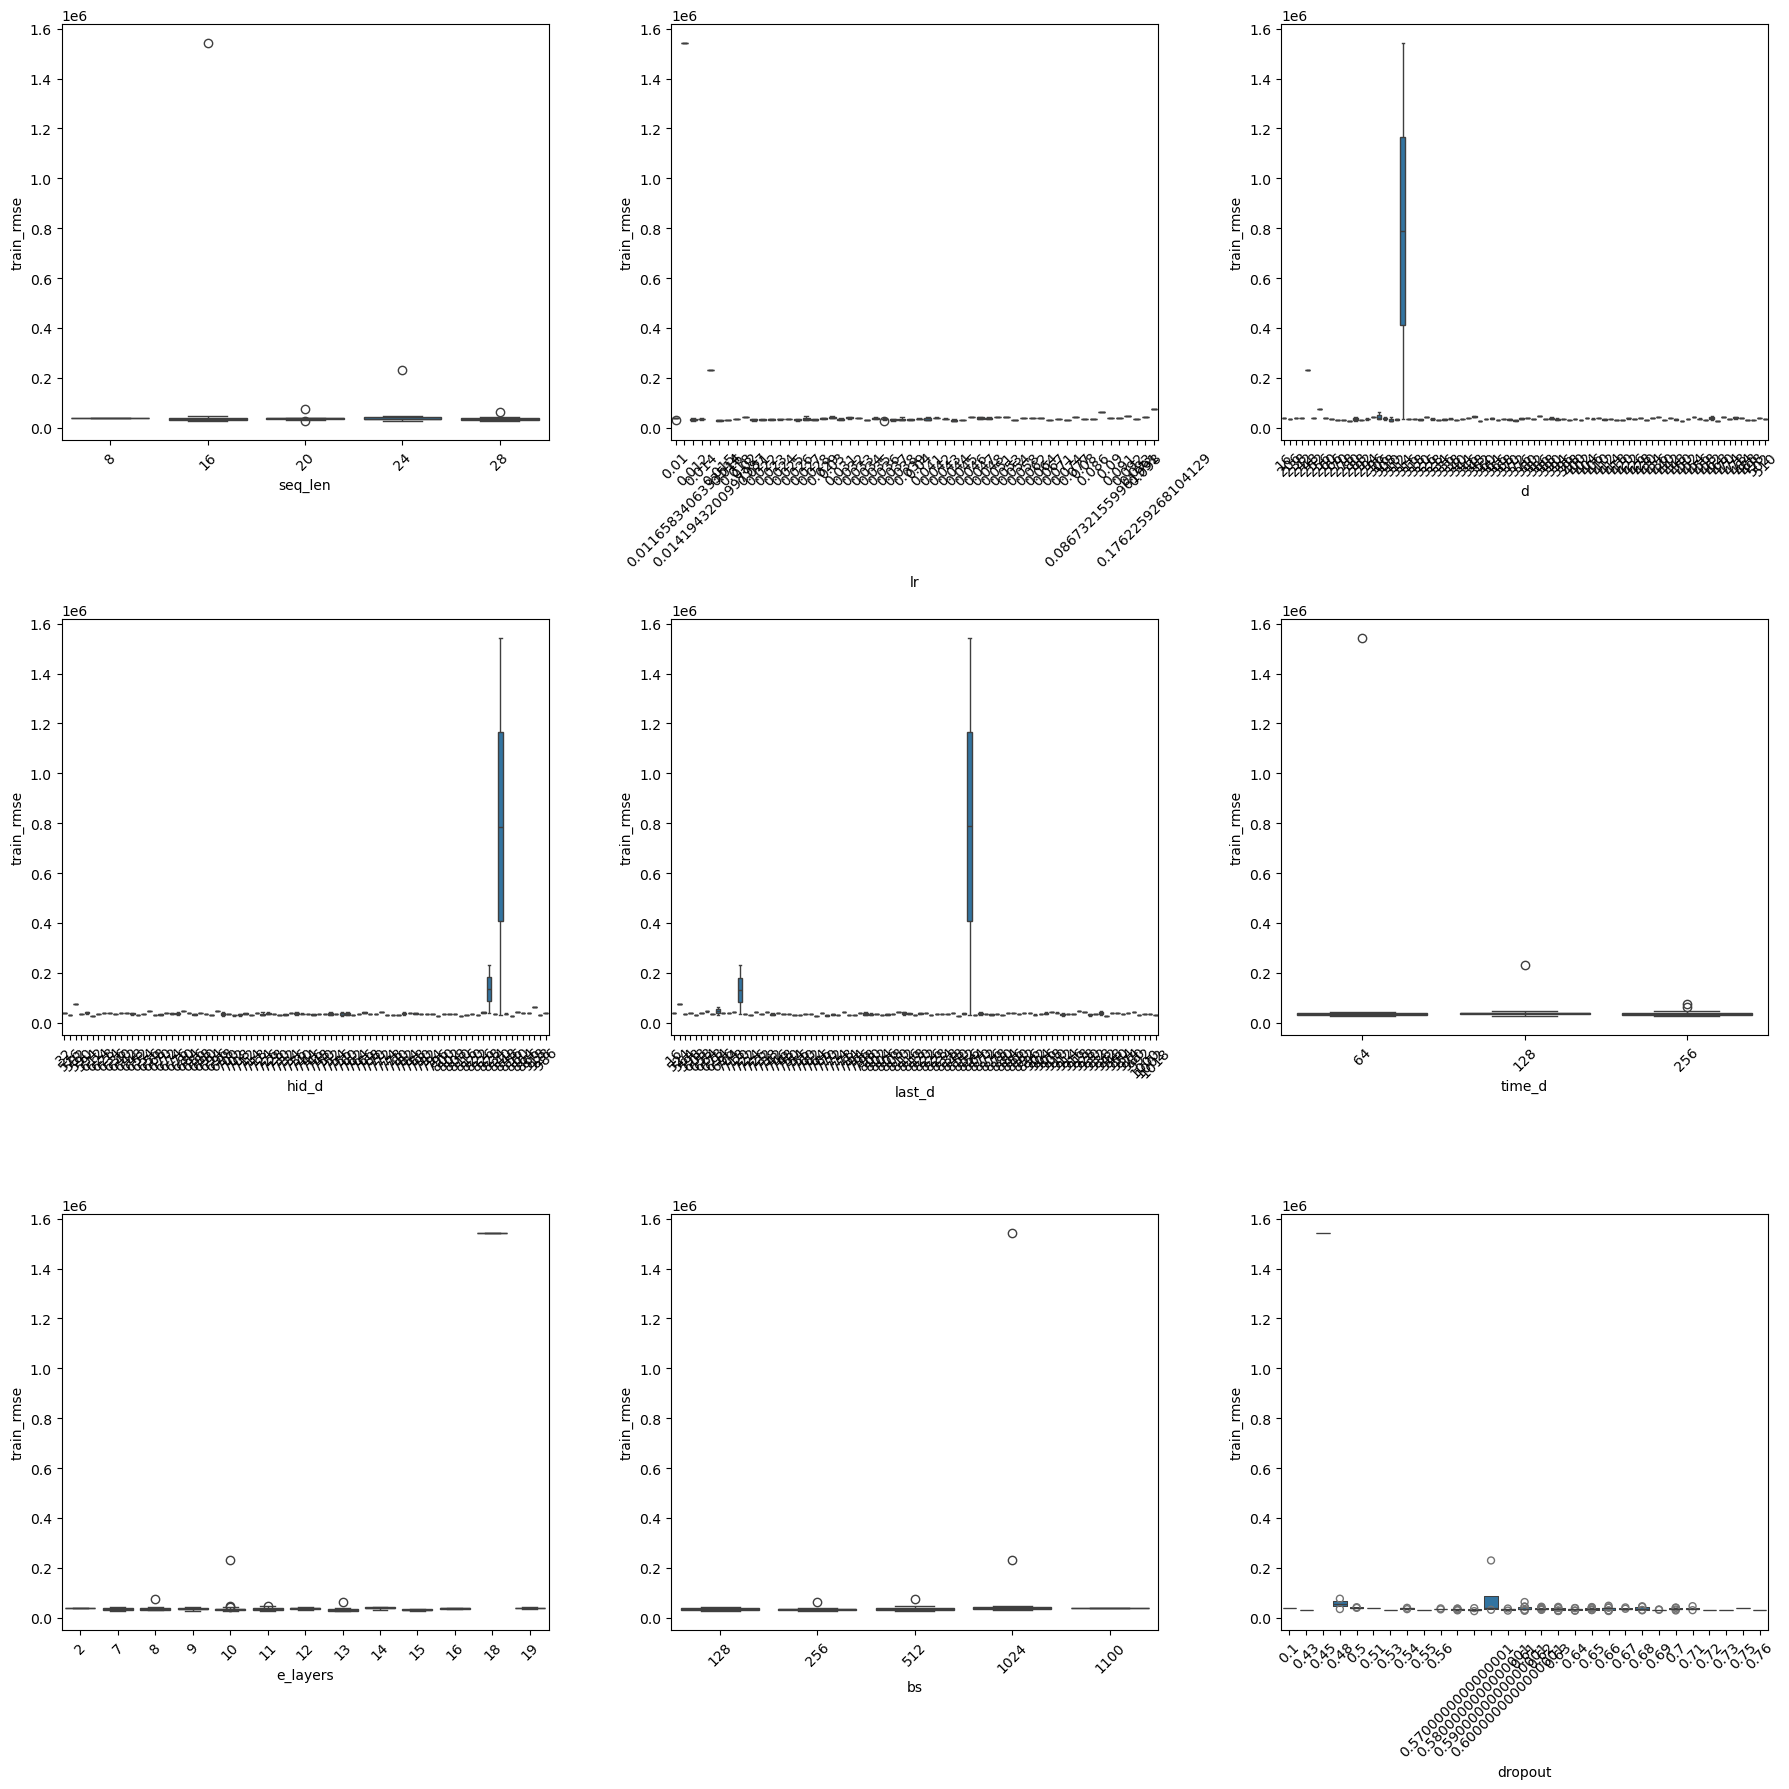

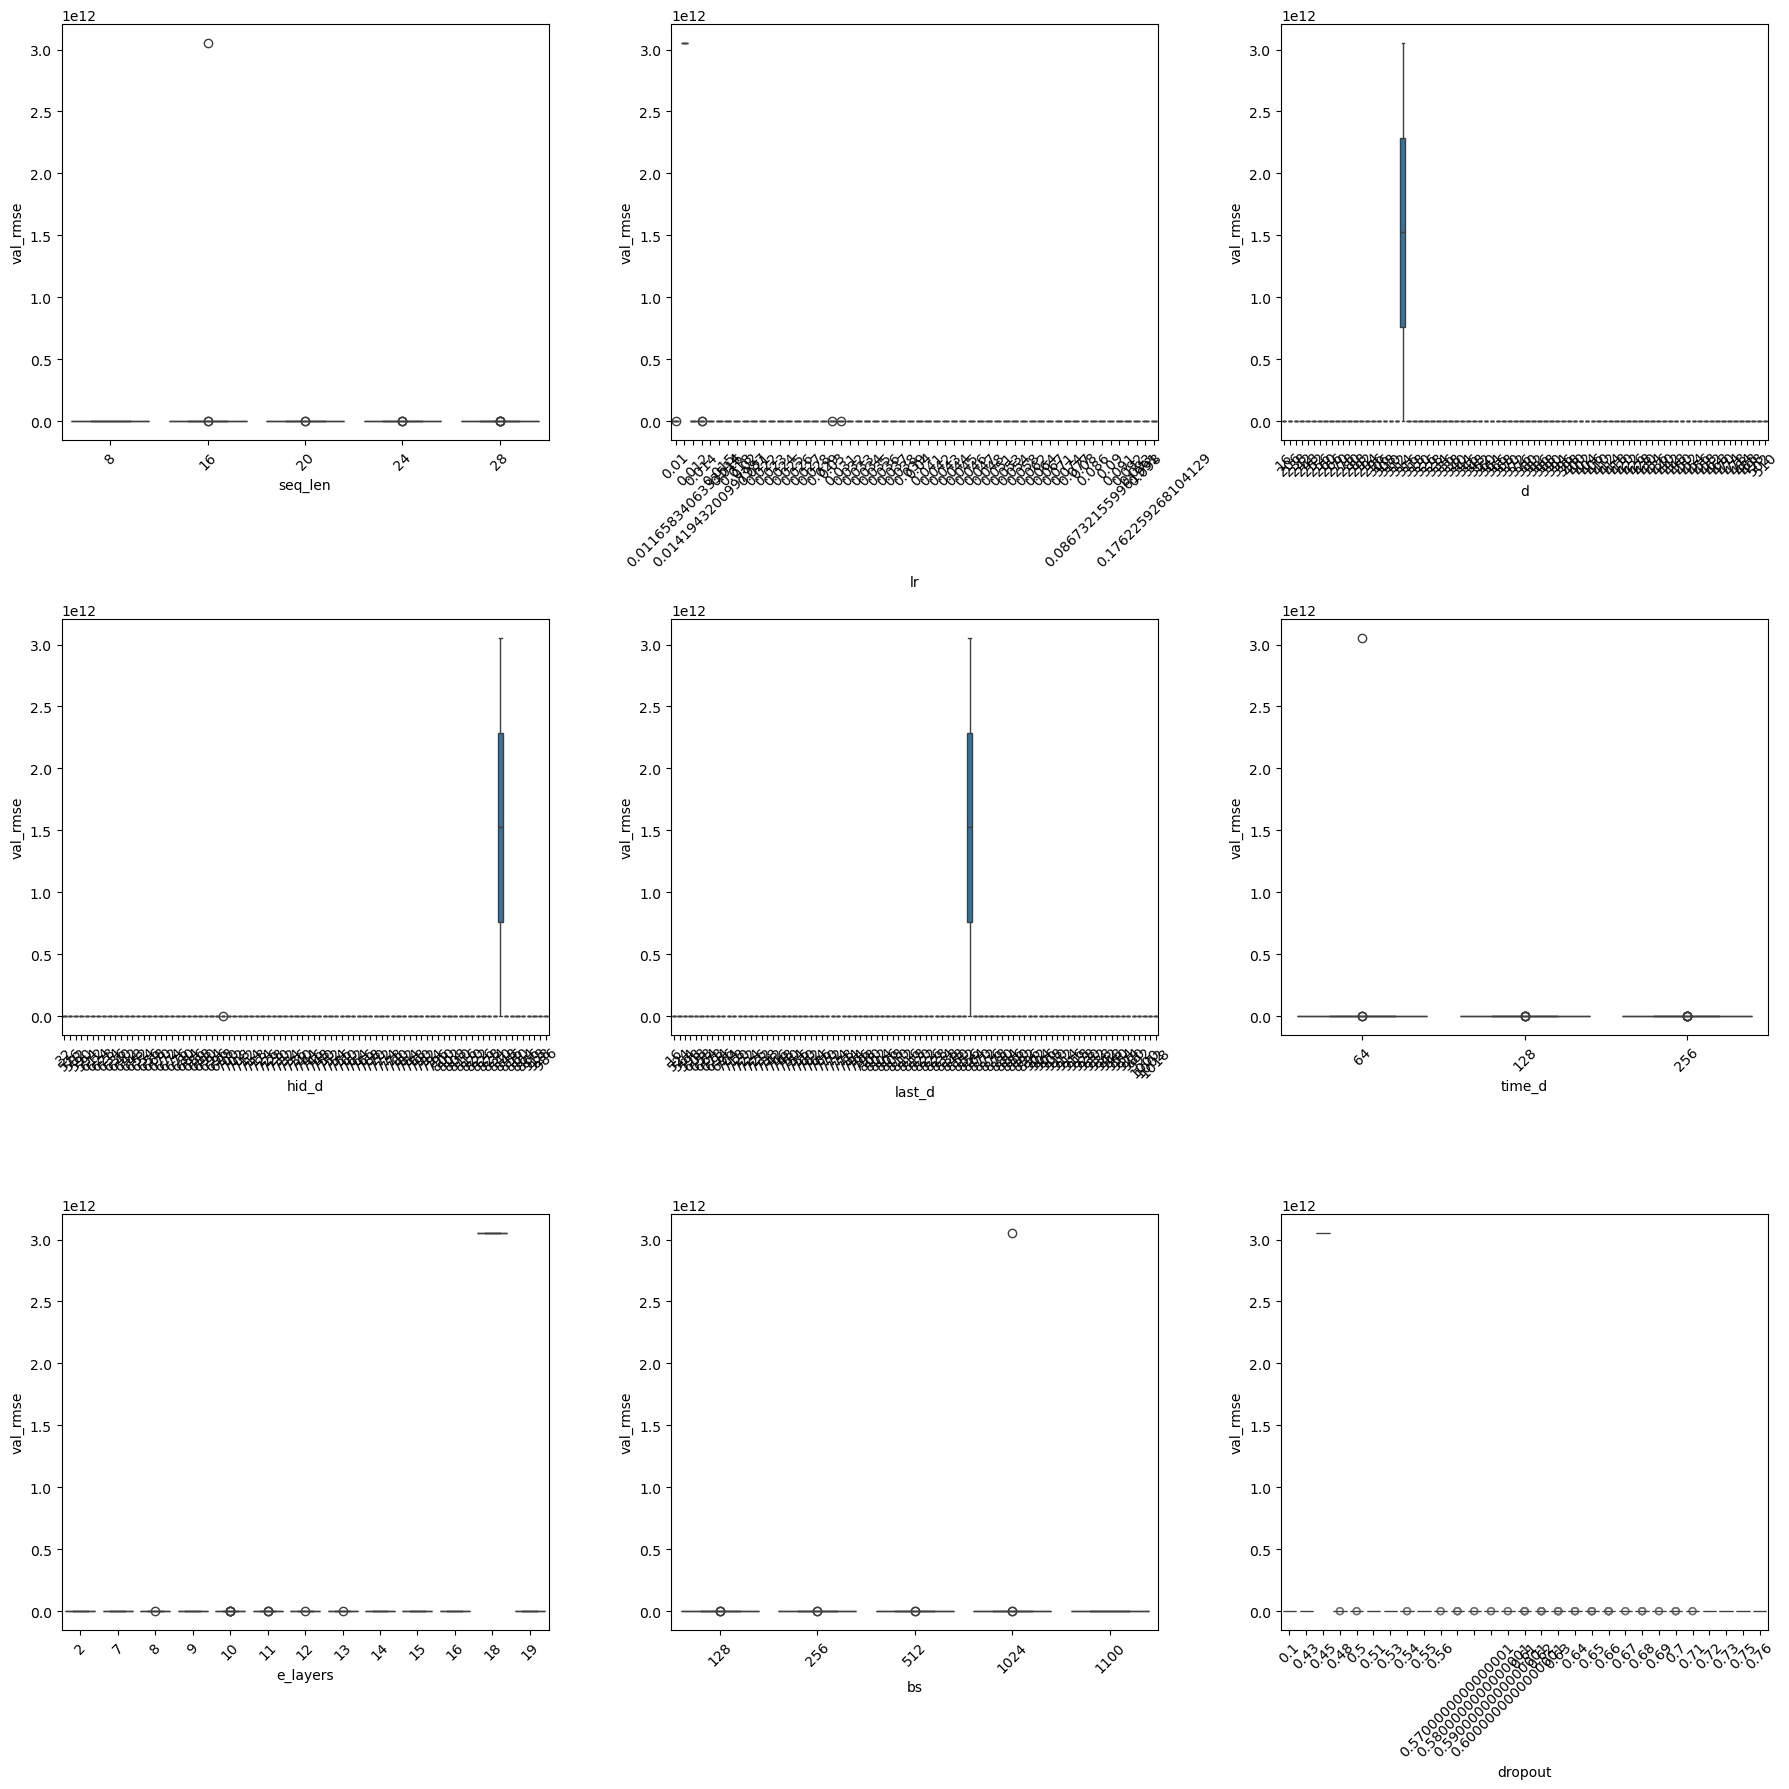

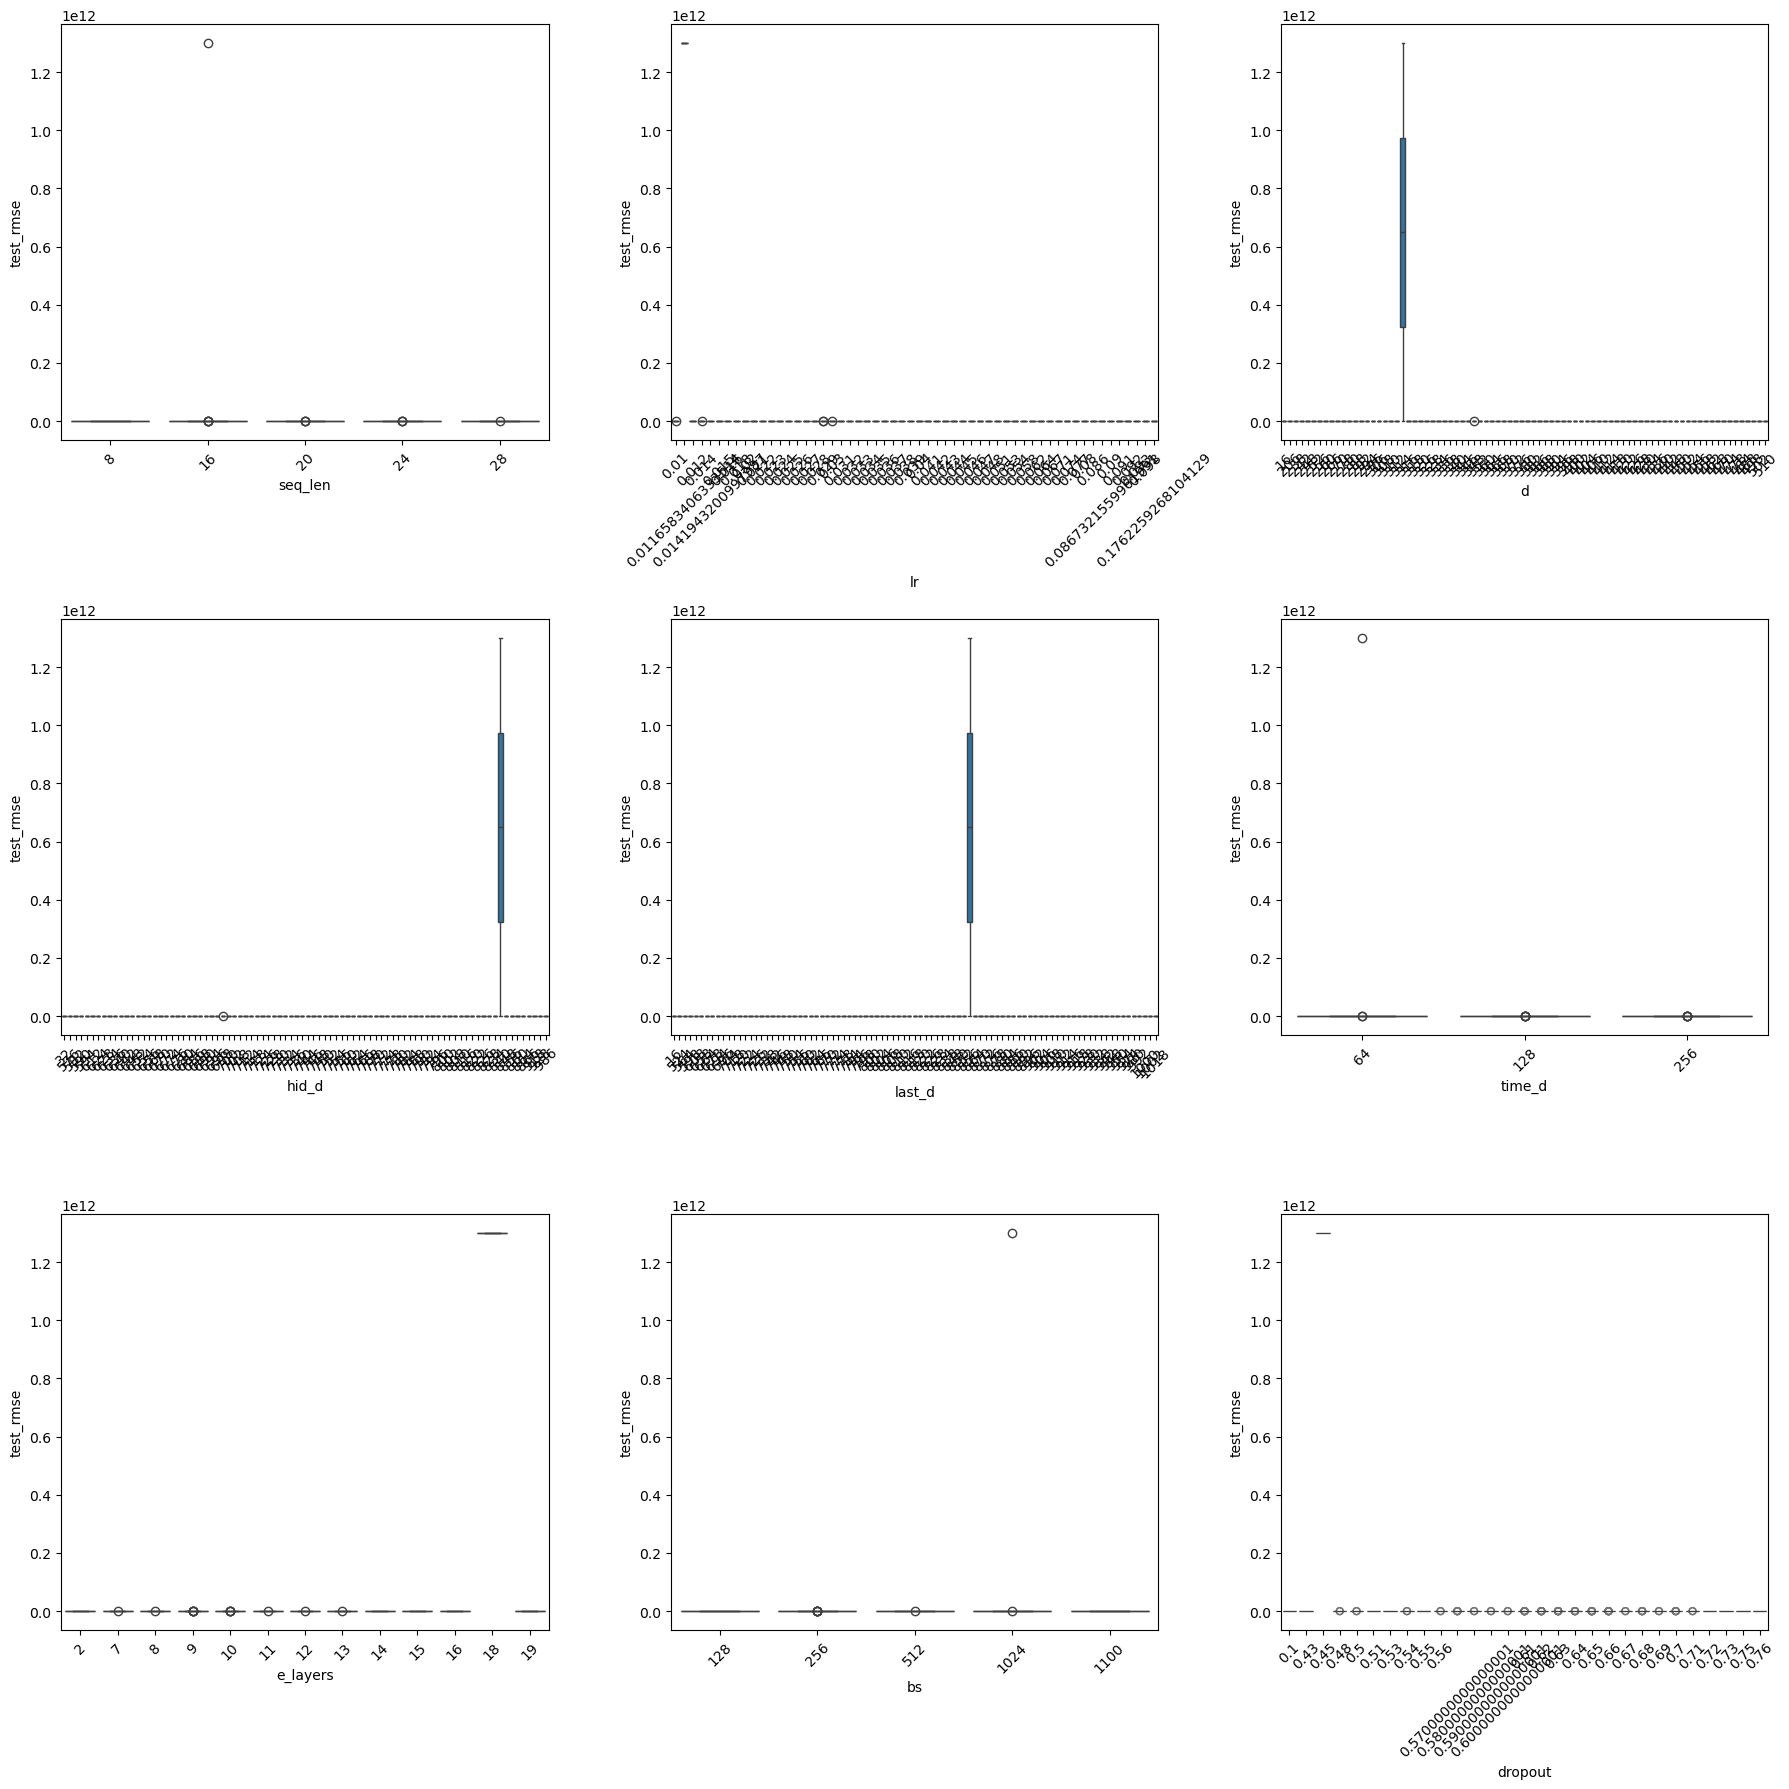

In [20]:
# Analyzing the effect of each setting on RMSEs
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Plotting
sns.boxplot(ax=axes[0, 0], x="seq_len", y="train_rmse", data=df)
sns.boxplot(ax=axes[0, 1], x="lr", y="train_rmse", data=df)
sns.boxplot(ax=axes[0, 2], x="d", y="train_rmse", data=df)
sns.boxplot(ax=axes[1, 0], x="hid_d", y="train_rmse", data=df)
sns.boxplot(ax=axes[1, 1], x="last_d", y="train_rmse", data=df)
sns.boxplot(ax=axes[1, 2], x="time_d", y="train_rmse", data=df)
sns.boxplot(ax=axes[2, 0], x="e_layers", y="train_rmse", data=df)
sns.boxplot(ax=axes[2, 1], x="bs", y="train_rmse", data=df)
sns.boxenplot(ax=axes[2, 2], x="dropout", y="train_rmse", data=df)


for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

# Repeat for val_rmse and test_rmse
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

sns.boxplot(ax=axes[0, 0], x="seq_len", y="val_rmse", data=df)
sns.boxplot(ax=axes[0, 1], x="lr", y="val_rmse", data=df)
sns.boxplot(ax=axes[0, 2], x="d", y="val_rmse", data=df)
sns.boxplot(ax=axes[1, 0], x="hid_d", y="val_rmse", data=df)
sns.boxplot(ax=axes[1, 1], x="last_d", y="val_rmse", data=df)
sns.boxplot(ax=axes[1, 2], x="time_d", y="val_rmse", data=df)
sns.boxplot(ax=axes[2, 0], x="e_layers", y="val_rmse", data=df)
sns.boxplot(ax=axes[2, 1], x="bs", y="val_rmse", data=df)
sns.boxenplot(ax=axes[2, 2], x="dropout", y="val_rmse", data=df)

for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(3, 3, figsize=(18, 18))

sns.boxplot(ax=axes[0, 0], x="seq_len", y="test_rmse", data=df)
sns.boxplot(ax=axes[0, 1], x="lr", y="test_rmse", data=df)
sns.boxplot(ax=axes[0, 2], x="d", y="test_rmse", data=df)
sns.boxplot(ax=axes[1, 0], x="hid_d", y="test_rmse", data=df)
sns.boxplot(ax=axes[1, 1], x="last_d", y="test_rmse", data=df)
sns.boxplot(ax=axes[1, 2], x="time_d", y="test_rmse", data=df)
sns.boxplot(ax=axes[2, 0], x="e_layers", y="test_rmse", data=df)
sns.boxplot(ax=axes[2, 1], x="bs", y="test_rmse", data=df)
sns.boxenplot(ax=axes[2, 2], x="dropout", y="test_rmse", data=df)

for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

In [21]:
# Calculate the sum of rmse values for each row

df["sum_rmse"] = 0.2* df["train_rmse"] +0.4* df["val_rmse"] + 0.4* df["test_rmse"]

# Sort the rows based on the sum of rmse values
sorted_df = df.sort_values(by="sum_rmse")


In [23]:
sorted_df

,exp_date,train_rmse,train_custom_acc,val_rmse_for_best_train,val_custom_acc_for_best_train,test_rmse_for_best_train,test_custom_acc_for_best_train,train_epoch_for_best_train,val_rmse,val_custom_acc,...,d,hid_d,last_d,time_d,e_layers,token_emb_kernel_size,dropout,comb_type,bs,sum_rmse
51,2024-08-02 00:34,27382.190,72.259148,95855.630,-6.663542,84437.07,-3.633292,18,6.824893e+04,4.137405e+01,...,310,796,930,128,7,13,0.63,add,512,5.984423e+04
7,2024-08-02 05:46,33563.934,64.386635,79700.070,36.228813,70052.42,40.315262,13,7.038778e+04,3.920943e+01,...,312,732,760,256,10,10,0.70,add,256,6.008628e+04
43,2024-08-02 03:56,28254.176,68.983734,87573.240,-7.410346,90718.79,-9.864959,23,6.651939e+04,3.747285e+01,...,450,856,942,128,9,13,0.64,add,256,6.012341e+04
44,2024-08-02 01:16,29688.025,68.591141,82428.640,2.520533,82698.06,-8.858468,20,6.729125e+04,4.079929e+01,...,320,928,818,256,13,11,0.63,add,256,6.022747e+04
30,2024-08-02 04:13,31223.695,67.008644,110947.930,-31.691597,101927.83,-38.498322,20,6.414918e+04,4.419476e+01,...,448,816,864,256,9,14,0.65,add,512,6.023782e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2024-08-02 02:26,26535.775,72.728157,76358.610,26.152374,74493.80,13.983840,22,1.808721e+05,-2.447184e+01,...,468,698,942,128,13,14,0.58,add,256,1.070913e+05
131,2024-08-02 02:03,36713.340,62.207645,77397.550,40.059330,72535.83,44.233681,12,2.172608e+05,-5.020332e+01,...,474,670,954,128,11,14,0.65,add,256,1.230311e+05
62,2024-08-01 22:46,76387.140,5.152960,98520.836,-11.085560,97682.41,-38.072155,2,5.115562e+06,-6.479598e+03,...,256,582,524,256,8,11,0.48,add,512,5.265549e+06
15,2024-08-01 22:49,229666.770,-50.743649,111807.460,35.025188,94283.73,28.356054,2,6.621921e+07,-4.691132e+04,...,248,828,720,128,10,11,0.59,add,1024,2.837138e+07


In [25]:

# Print the top rows with the minimal sum of rmse
top_n = 10  # Number of top rows to print


# Drop the specified columns
columns_to_drop = [
    # "train_custom_acc_for_best_val",
    # "train_custom_acc",
    # "val_custom_acc",
    # "test_custom_acc",
    # "train_custom_acc_for_best_test",
    # "val_custom_acc_for_best_train",
    # "val_custom_acc_for_best_test",
    # "test_custom_acc_for_best_train",
    # "test_custom_acc_for_best_val",
]

output = sorted_df.head(top_n).drop(columns=columns_to_drop)



In [26]:

# print last few columns
print(output.iloc[:, -30:])

     val_custom_acc_for_best_train  test_rmse_for_best_train  \
51                       -6.663542                  84437.07   
7                        36.228813                  70052.42   
43                       -7.410346                  90718.79   
44                        2.520533                  82698.06   
30                      -31.691597                 101927.83   
130                     -39.024464                  90743.92   
78                        9.775322                  75570.18   
24                       -0.329179                  90359.40   
42                       36.948471                  78690.57   
82                       -9.942989                  91145.71   

     test_custom_acc_for_best_train  train_epoch_for_best_train   val_rmse  \
51                        -3.633292                          18  68248.930   
7                         40.315262                          13  70387.780   
43                        -9.864959                          